In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

xlim  (3.9734500065298231, 10.807292643804692)  ylim  (-11.082326233912445, -1.0805946182292332)


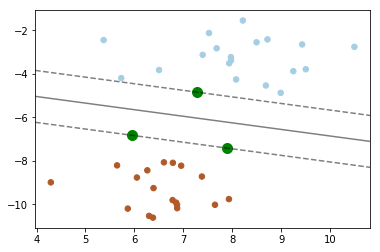

In [15]:
# svc中支持向量和margin的示例
X, y = make_blobs(n_samples=40, centers=2, random_state=6) 
clf  = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plt.show()

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
print('xlim ', xlim, ' ylim ', ylim)

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# 画 分类边界 以及 间隔
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# 画出支持向量，即图中重点点出的 点，这仨个点支撑起来了整个分类边界
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='g')
plt.show()

In [14]:
# help(clf.decision_function)
print(clf.support_vectors_, clf.classes_)


[[ 7.27059007 -4.84225716]
 [ 5.95313618 -6.82945967]
 [ 7.89359985 -7.41655113]] [0 1]


In [16]:
help(np.r_)

Help on RClass in module numpy.lib.index_tricks object:

class RClass(AxisConcatenator)
 |  Translates slice objects to concatenation along the first axis.
 |  
 |  This is a simple way to build up arrays quickly. There are two use cases.
 |  
 |  1. If the index expression contains comma separated arrays, then stack
 |     them along their first axis.
 |  2. If the index expression contains slice notation or scalars then create
 |     a 1-D array with a range indicated by the slice notation.
 |  
 |  If slice notation is used, the syntax ``start:stop:step`` is equivalent
 |  to ``np.arange(start, stop, step)`` inside of the brackets. However, if
 |  ``step`` is an imaginary number (i.e. 100j) then its integer portion is
 |  interpreted as a number-of-points desired and the start and stop are
 |  inclusive. In other words ``start:stop:stepj`` is interpreted as
 |  ``np.linspace(start, stop, step, endpoint=1)`` inside of the brackets.
 |  After expansion of slice notation, all comma sep

In [26]:
a = np.array([[0,1,2], [3,4,5]])
b = np.array([[0,1], [2,3], [4,5]])
print(a.shape, b.shape)
print(np.r_[ a, b])
print(np.r_[a,a].shape)

(2, 3) (3, 2)


ValueError: all the input array dimensions except for the concatenation axis must match exactly